<a href="https://colab.research.google.com/github/hchinaglia/repo_data_science_airbnb/blob/main/Analise_de_Dados_do_Airbnb(Dallas%2C_Texas%2C_United_States).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Dallas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Dallas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Dallas (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/tx/dallas/2023-08-15/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://drive.google.com/file/d/1MDCNTS1ZHhPm5hSPgbPKP5c9GvH-4CZQ/view?usp=sharing) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/tx/dallas/2023-08-15/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,776810,Loft in Dallas · ★4.90 · 1 bedroom · 1 bed · 1...,4096626,Eric,NaN,District 2,32.81462,-96.81586,Entire home/apt,75,5,29,2020-03-26,0.22,1,300,0,NaN
1,795703,Condo in Dallas · ★4.84 · 1 bedroom · 1 bed · ...,4191322,Michelle,NaN,District 14,32.80327,-96.80976,Entire home/apt,243,30,70,2022-09-25,0.55,1,254,1,NaN
2,826118,Home in Dallas · ★4.83 · 1 bedroom · 1 bed · 1...,804559,Rod,NaN,District 12,32.98825,-96.78926,Private room,62,2,24,2023-06-12,0.24,4,316,4,NaN
3,826178,Home in Dallas · ★5.0 · 1 bedroom · 2 beds · 1...,804559,Rod,NaN,District 12,32.98621,-96.78857,Private room,40,2,23,2020-01-31,0.19,4,285,0,NaN
4,826201,Home in Dallas · ★4.77 · 1 bedroom · 1 bed · 1...,804559,Rod,NaN,District 12,32.98853,-96.78903,Private room,54,30,31,2023-03-07,0.25,4,150,5,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`, há uma versão mais completa (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("Linhas:\t {}".format(df.shape[0]))
print("Colunas:\t {}".format(df.shape[1]))

# verificar os tipos de cada coluna do dataset
display(df.dtypes)

Linhas:	 5604
Colunas:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as colunas `neighbourhood_group` e `license` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 17% das linhas.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  17.041399
last_review                        17.041399
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

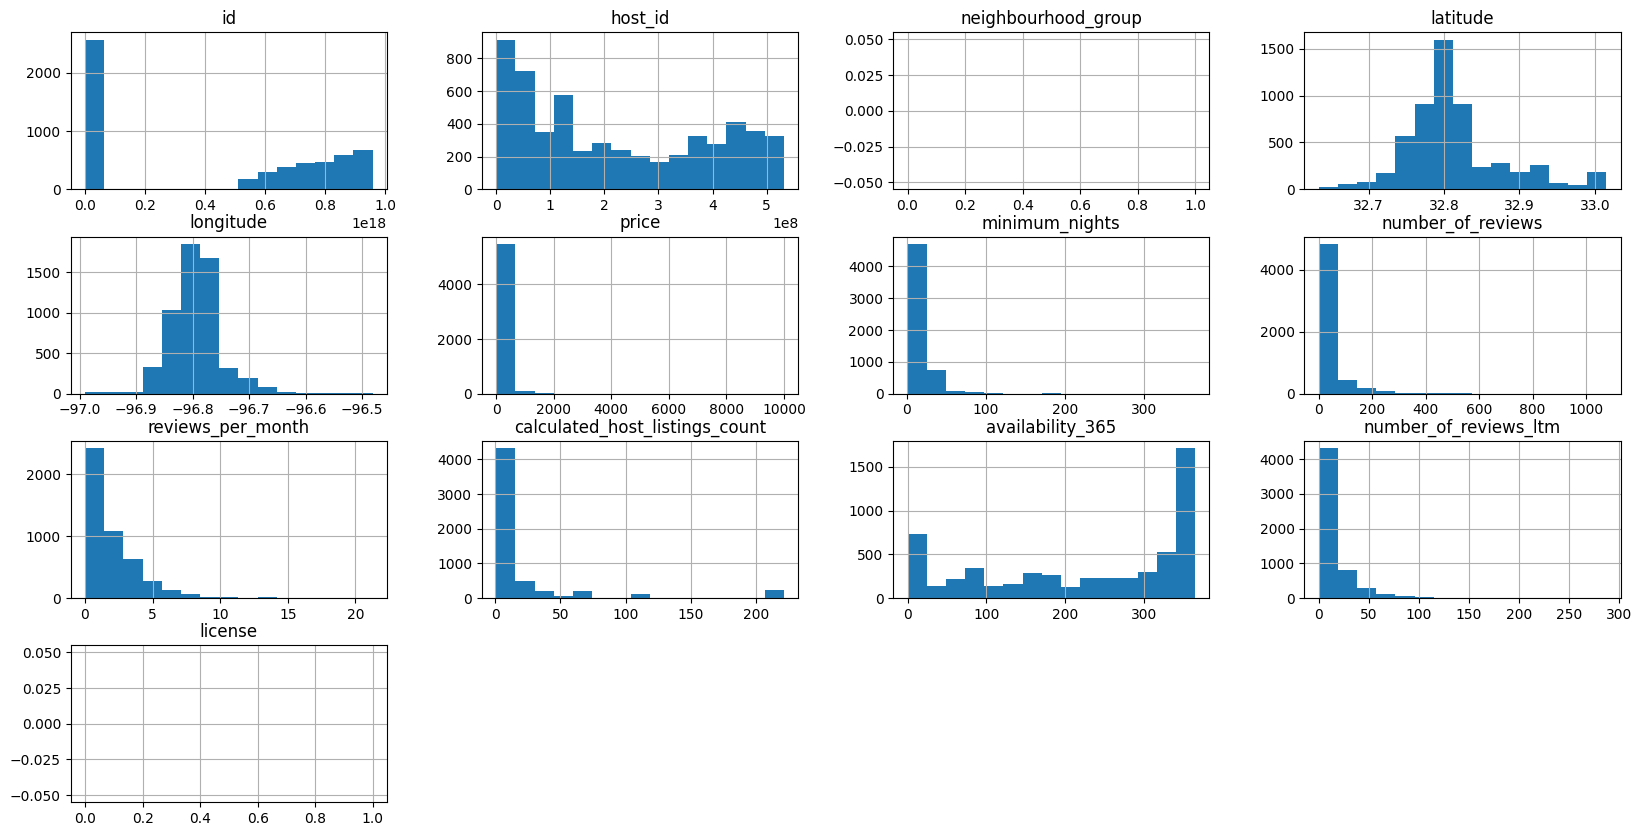

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`, `calculated_host_listings_count`, entre outras.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5604.000000,5604.000000,5604.000000,4649.000000,5604.000000,5604.000000
mean,180.842791,8.526945,35.670236,1.951222,19.826909,223.780692
std,358.827117,18.107118,71.291764,1.993195,45.742827,131.287107
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.000000,2.000000,0.480000,1.000000,95.000000
50%,120.000000,2.000000,10.000000,1.330000,3.000000,264.500000
75%,188.250000,5.000000,37.000000,2.840000,13.000000,349.000000
max,9999.000000,365.000000,1076.000000,21.270000,221.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 189, porém seu valor máximo é 9999.
* O valor maximo da quantidade mínima de noites (`minimum_nights`) é de 365 dias no ano, enquanto 75% dos valores é a baixo de 5 dias.

#### Boxplot para minimum_nights

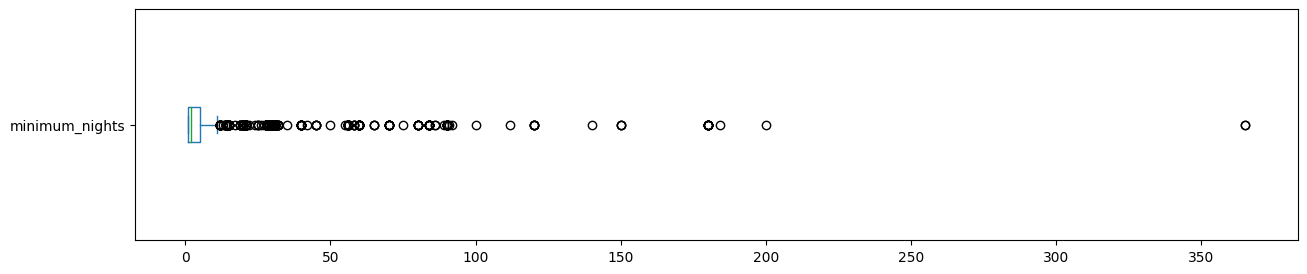

minimum_nights - valores acima de 90 dias:
27 entradas
0.4818%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 90 dias para minimum_nights
print("minimum_nights - valores acima de 90 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 90])))
print("{:.4f}%".format((len(df[df.minimum_nights > 90]) / df.shape[0]) * 100))

#### Boxplot para price

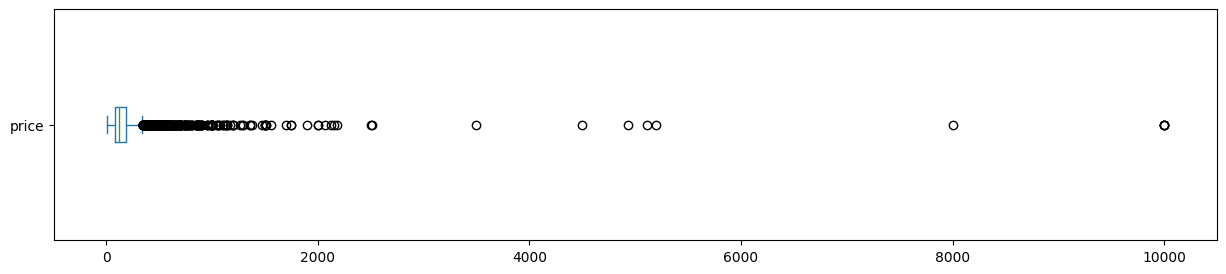

price - valores acima de 1000 a diária:
51 entradas
0.9101%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 1000 para price
print("price - valores acima de 1000 a diária:")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0]) * 100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights` , vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

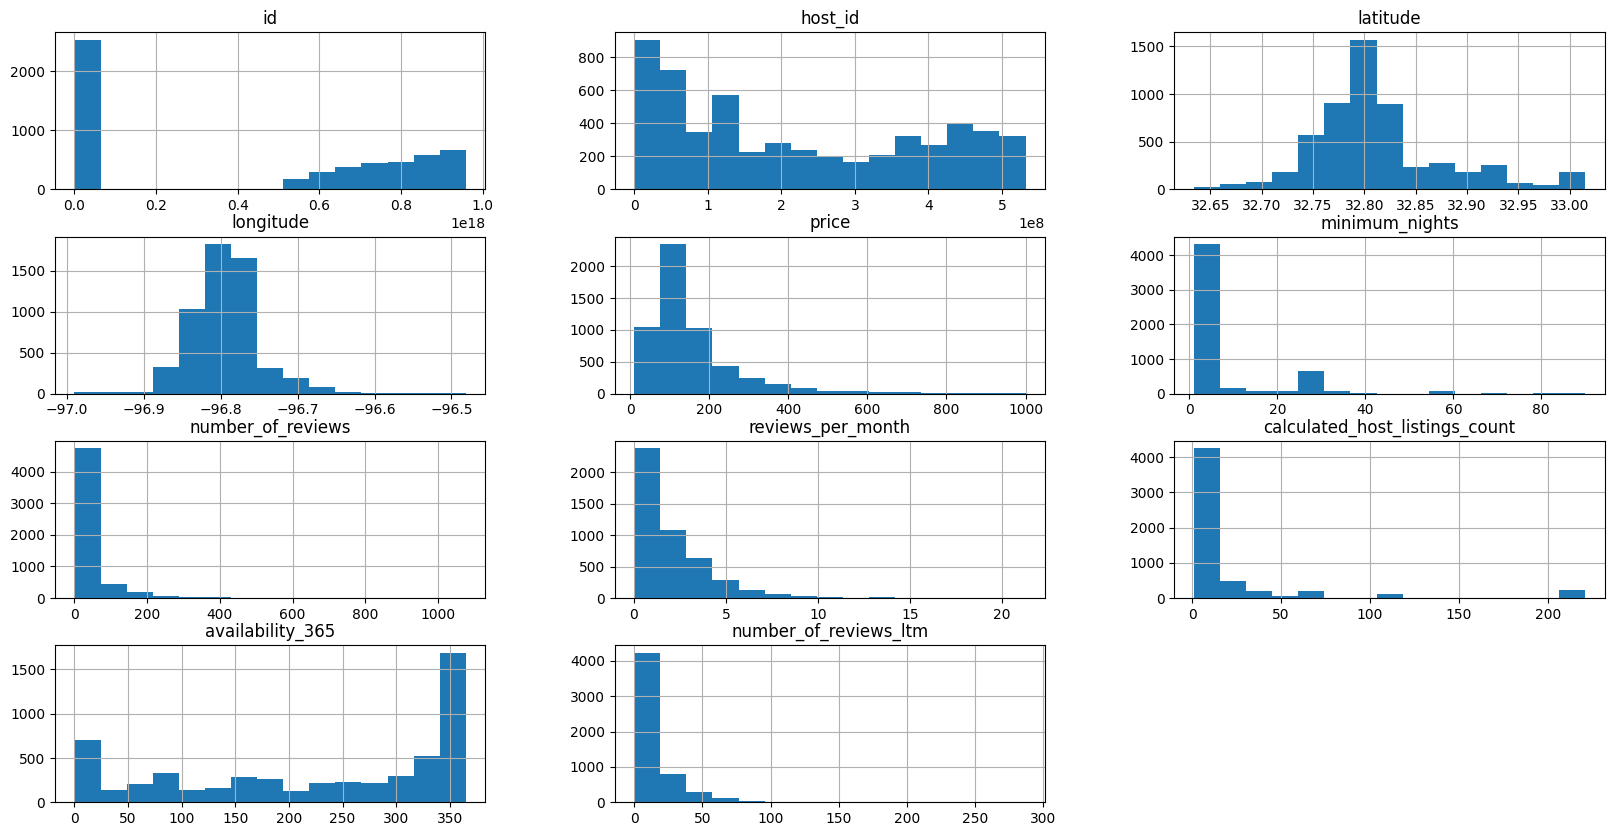

In [11]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)

# remover `neighbourhood_group` e `license`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,10));

#### Boxplot sem *outliers*

Vamos plotar novamente o boxplot nas variáveis `price` e `minimum_nights` sem os *outliers*.

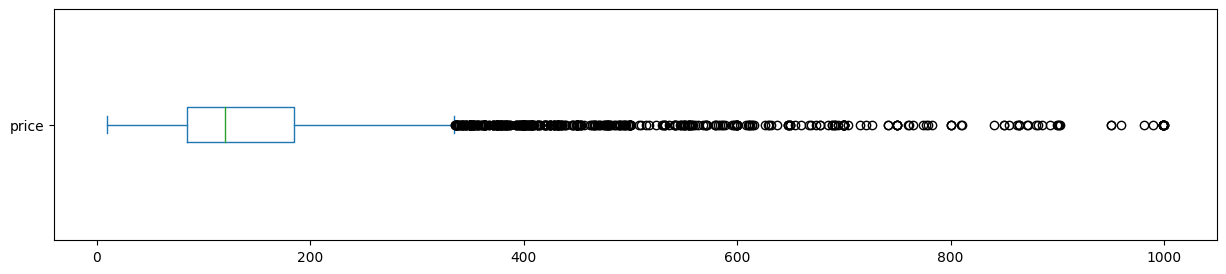

price - valores a baixo de 1000:
5524 entradas
99.9457%


In [41]:
df_clean.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("price - valores a baixo de 1000:")
print("{} entradas".format(len(df_clean[df_clean.price < 1000])))
print("{:.4f}%".format((len(df_clean[df_clean.price < 1000]) / df_clean.shape[0]*100)))

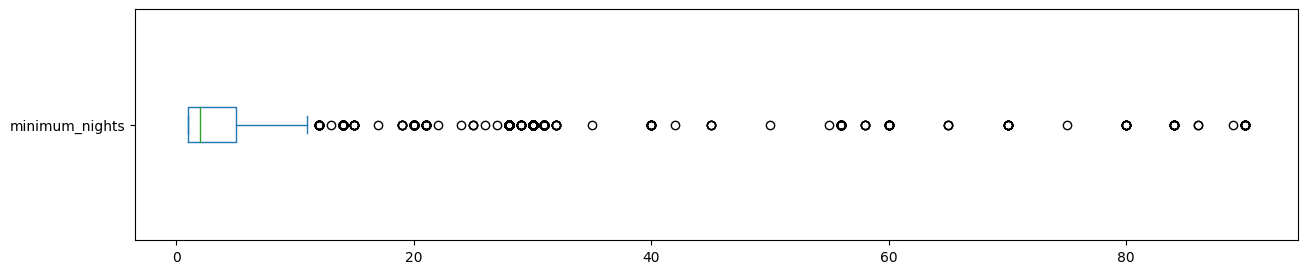

minimum_nights - valores a baixo de 90:
5508 entradas
99.6562%


In [42]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("minimum_nights - valores a baixo de 90:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights < 90])))
print("{:.4f}%".format((len(df_clean[df_clean.minimum_nights < 90]) / df_clean.shape[0]*100)))

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.103757,-0.061818,-0.036477,-0.061354,-0.013069
minimum_nights,-0.103757,1.000000,-0.153091,-0.304926,0.290870,0.027898
number_of_reviews,-0.061818,-0.153091,1.000000,0.604139,-0.098084,-0.053115
reviews_per_month,-0.036477,-0.304926,0.604139,1.000000,-0.195759,0.015551
calculated_host_listings_count,-0.061354,0.290870,-0.098084,-0.195759,1.000000,0.059798
availability_365,-0.013069,0.027898,-0.053115,0.015551,0.059798,1.000000


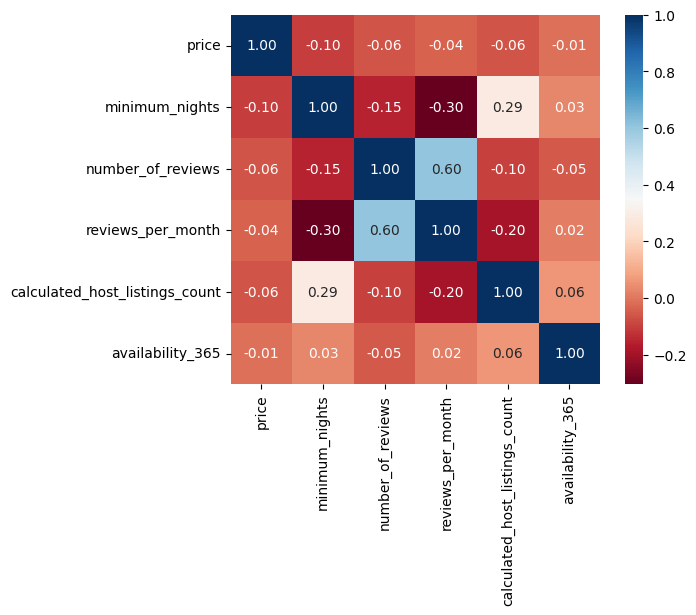

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4762
Private room        687
Shared room          78
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    86.158857
Private room       12.429890
Shared room         1.411254
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [22]:
# ver média de preços por bairros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
District 6     236.254682
District 13    198.108434
District 14    162.545389
District 3     161.904762
District 9     159.492462
District 11    158.768953
District 2     153.081215
District 10    150.717073
District 4     149.743243
District 1     139.970070
District 12    139.599119
District 7     136.406114
District 5     123.379310
District 8     113.363636
Name: price, dtype: float64

In [37]:
# ver quantidade de imóveis em cada bairro
print("Quantidade de imóveis no District 1: {}".format(df_clean[df_clean.neighbourhood == "District 1"].shape[0]))
print("Quantidade de imóveis no District 2: {}".format(df_clean[df_clean.neighbourhood == "District 2"].shape[0]))
print("Quantidade de imóveis no District 3: {}".format(df_clean[df_clean.neighbourhood == "District 3"].shape[0]))
print("Quantidade de imóveis no District 4: {}".format(df_clean[df_clean.neighbourhood == "District 4"].shape[0]))
print("Quantidade de imóveis no District 5: {}".format(df_clean[df_clean.neighbourhood == "District 5"].shape[0]))
print("Quantidade de imóveis no District 6: {}".format(df_clean[df_clean.neighbourhood == "District 6"].shape[0]))
print("Quantidade de imóveis no District 7: {}".format(df_clean[df_clean.neighbourhood == "District 7"].shape[0]))
print("Quantidade de imóveis no District 8: {}".format(df_clean[df_clean.neighbourhood == "District 8"].shape[0]))
print("Quantidade de imóveis no District 9: {}".format(df_clean[df_clean.neighbourhood == "District 9"].shape[0]))
print("Quantidade de imóveis no District 10: {}".format(df_clean[df_clean.neighbourhood == "District 10"].shape[0]))
print("Quantidade de imóveis no District 11: {}".format(df_clean[df_clean.neighbourhood == "District 11"].shape[0]))
print("Quantidade de imóveis no District 12: {}".format(df_clean[df_clean.neighbourhood == "District 12"].shape[0]))
print("Quantidade de imóveis no District 13: {}".format(df_clean[df_clean.neighbourhood == "District 13"].shape[0]))
print("Quantidade de imóveis no District 14: {}".format(df_clean[df_clean.neighbourhood == "District 14"].shape[0]))

Quantidade de imóveis no District 1: 568
Quantidade de imóveis no District 2: 1613
Quantidade de imóveis no District 3: 84
Quantidade de imóveis no District 4: 148
Quantidade de imóveis no District 5: 29
Quantidade de imóveis no District 6: 267
Quantidade de imóveis no District 7: 229
Quantidade de imóveis no District 8: 55
Quantidade de imóveis no District 9: 199
Quantidade de imóveis no District 10: 205
Quantidade de imóveis no District 11: 277
Quantidade de imóveis no District 12: 227
Quantidade de imóveis no District 13: 249
Quantidade de imóveis no District 14: 1377


In [30]:
# ver as 10 primeiras entradas do District 6
df_clean[df_clean.neighbourhood == "District 6"][:10]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
54,5778671,Home in Dallas · ★4.75 · 1 bedroom · 1 bed · 1...,1294259,MsPadilla,District 6,32.873510,-96.851590,Private room,35,7,9,2020-02-03,0.09,3,363,0
61,7597852,Home in Dallas · ★4.80 · 1 bedroom · 1 bed · 1...,1294259,MsPadilla,District 6,32.871670,-96.852740,Private room,32,30,5,2022-09-11,0.05,3,74,1
287,18979631,Home in Dallas · ★New · 4 bedrooms · 6 beds · ...,36392652,Ashu,District 6,32.779820,-96.846480,Entire home/apt,312,2,1,2023-08-08,1.00,1,249,1
352,21199299,Home in Dallas · ★5.0 · 4 bedrooms · 6 beds · ...,121600765,Elaine,District 6,32.781770,-96.844171,Entire home/apt,335,2,23,2023-08-06,2.21,1,331,23
470,24633765,Home in Dallas · ★4.49 · 5 bedrooms · 7 beds ·...,185715595,Reginald,District 6,32.790840,-96.862760,Entire home/apt,197,2,178,2023-07-23,2.78,1,106,31
474,24833650,Home in Dallas · ★4.67 · 2 bedrooms · 2 beds ·...,2548601,Donna,District 6,32.877440,-96.852380,Entire home/apt,105,31,6,2022-02-02,0.10,1,87,0
501,26248646,Home in Dallas · ★5.0 · 3 bedrooms · 3 beds · ...,50284779,Kelsea,District 6,32.877110,-96.843750,Entire home/apt,275,26,20,2023-04-26,0.33,2,287,3
518,26775608,Rental unit in Dallas · ★5.0 · 1 bedroom · 1 b...,3583143,Shaun,District 6,32.865610,-96.841560,Private room,49,1,375,2023-07-13,6.08,1,0,73
600,29189852,Rental unit in Dallas · 1 bedroom · 1 bed · 1 ...,219945197,The Avalanche,District 6,32.798704,-96.820959,Entire home/apt,135,2,1,2023-06-02,0.39,1,303,1
604,29421537,Guesthouse in Dallas · ★4.69 · Studio · 1 bed ...,5440702,Heather,District 6,32.790370,-96.851650,Entire home/apt,40,1,72,2022-01-03,1.23,1,0,0


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

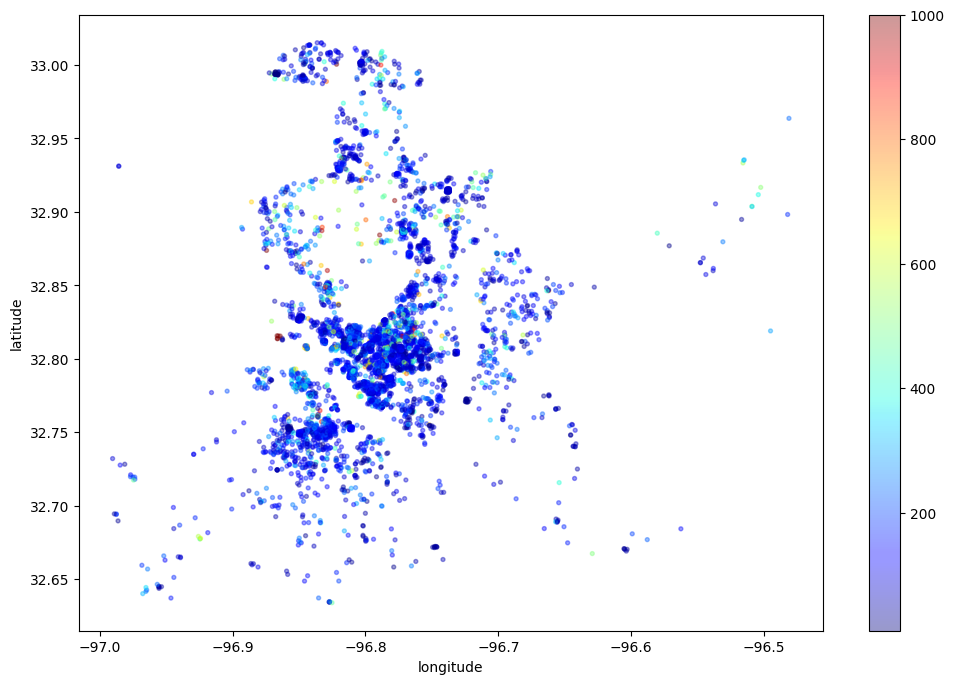

In [40]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos